In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy.stats as stats
import scipy.special
#graphing
import matplotlib.pyplot as plt
#stats
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel

#import testing
import sys
sys.path.append("../")
import vuong_plots

In [2]:
class JointNormal1(GenericLikelihoodModel):
    
    def loglikeobs(self, params):
        data = np.concatenate([[self.endog],self.exog.transpose()],axis=0)
        mult_rv = stats.multivariate_normal([params[0], 0.0], [[1,0],[0,1]])
        return mult_rv.logpdf(data.transpose())
    
    
class JointNormal2(GenericLikelihoodModel):
    
    def loglikeobs(self, params):
        data = np.concatenate([[self.endog],self.exog.transpose()],axis=0)
        mult_rv = stats.multivariate_normal([0.0, params[0]], [[1,0],[0,1]])
        return mult_rv.logpdf(data.transpose())


def setup_shi(yn,xn):
    # model 1 grad, etc.
    nobs = yn.shape[0]
    model1_param = np.array([yn.mean()])
    model2_param = np.array([xn.mean()])
    
    model1_deriv = JointNormal1(yn,xn)
    ll1 = model1_deriv.loglikeobs(model1_param)
    grad1 =  model1_deriv.score_obs(model1_param).reshape( (nobs,1) )
    hess1 = model1_deriv.hessian(model1_param)
    
    
    model2_deriv = JointNormal2(yn,xn)
    ll2 = model2_deriv.loglikeobs(model2_param)
    grad2 =  model2_deriv.score_obs(model2_param).reshape( (nobs,1) )  
    hess2 = model2_deriv.hessian(model2_param)
    
    return ll1,grad1,hess1,model1_param,ll2,grad2,hess2,model2_param

def gen_data(beta= 1.5, nobs=1000):
    cov = [[25, 0], [0, 1]]
    data = np.random.multivariate_normal([beta,beta], [[25,0],[0,1]],  nobs)
    return data[:,0],data[:,1],nobs

yn,xn,nobs = gen_data()
ll1,grad1,hess1,params1,ll2,grad2,hess2,params2 = setup_shi(yn,xn)
print(grad1.shape,hess1.shape)

(1000, 1) (1, 1)


../figs/ex2beta0


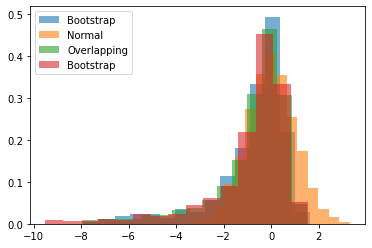

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.836 & 2.561 & -7.839 & 25.037 & -7.815 & 44.457 \\
Bootstrap & -0.901 & 3.155 & -12.489 & 57.469 & -12.451 & 86.798 \\
Normal & -0.009 & 1.021 & -0.009 & -0.095 & -0.009 & 3.028 \\
Overlapping & -0.821 & 2.546 & -7.798 & 26.323 & -7.793 & 45.710 \\
\bottomrule
\end{tabular}
\end{center}


In [3]:
gen_data_ex = lambda : gen_data(nobs=1000,beta=0)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/ex2beta0')

../figs/ex2beta5


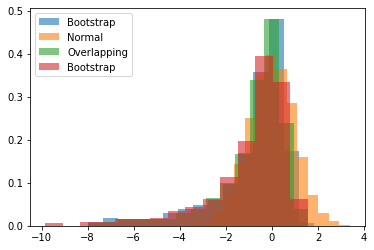

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.864 & 2.835 & -8.901 & 28.259 & -8.873 & 52.070 \\
Bootstrap & -0.990 & 3.267 & -11.653 & 48.644 & -11.617 & 80.184 \\
Normal & -0.026 & 0.991 & -0.076 & 0.028 & -0.076 & 2.973 \\
Overlapping & -0.813 & 2.405 & -7.330 & 25.674 & -7.326 & 42.970 \\
\bottomrule
\end{tabular}
\end{center}


In [4]:
gen_data_ex = lambda : gen_data(nobs=1000,beta=0)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/ex2beta5')

../figs/ex2beta10


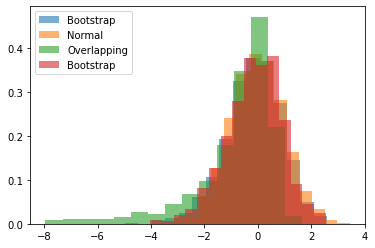

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.159 & 1.129 & -0.602 & 0.748 & -0.600 & 4.551 \\
Bootstrap & -0.155 & 1.104 & -0.482 & 0.409 & -0.480 & 4.045 \\
Normal & -0.015 & 0.982 & 0.018 & -0.040 & 0.018 & 2.849 \\
Overlapping & -0.829 & 2.473 & -7.563 & 26.204 & -7.559 & 44.493 \\
\bottomrule
\end{tabular}
\end{center}


In [12]:
gen_data_ex = lambda : gen_data(nobs=1000,beta=1.)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/ex2beta10')

../figs/ex2beta15


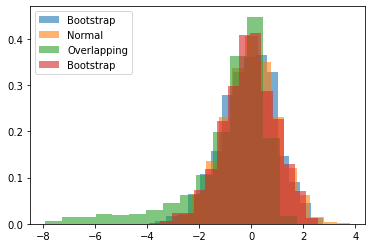

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.106 & 1.104 & -0.303 & 0.010 & -0.302 & 3.654 \\
Bootstrap & -0.089 & 1.021 & -0.326 & 0.238 & -0.325 & 3.352 \\
Normal & -0.010 & 1.028 & -0.041 & -0.020 & -0.041 & 3.148 \\
Overlapping & -0.847 & 2.636 & -7.990 & 25.475 & -7.985 & 46.272 \\
\bottomrule
\end{tabular}
\end{center}


In [14]:
gen_data_ex = lambda : gen_data(nobs=1000,beta=1.5)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/ex2beta15')

../figs/ex2beta20


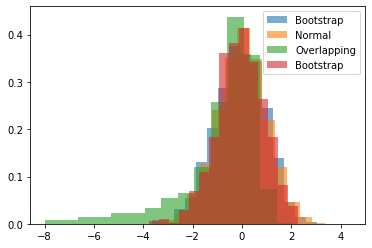

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.075 & 1.041 & -0.242 & -0.029 & -0.241 & 3.211 \\
Bootstrap & -0.069 & 0.930 & -0.222 & 0.177 & -0.222 & 2.761 \\
Normal & 0.013 & 0.985 & -0.045 & 0.035 & -0.045 & 2.941 \\
Overlapping & -0.841 & 2.513 & -7.509 & 24.510 & -7.505 & 43.402 \\
\bottomrule
\end{tabular}
\end{center}


In [7]:
gen_data_ex = lambda : gen_data(nobs=1000,beta=2)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/ex2beta20')